<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Regresion-Lineal/blob/main/3_Regresi%C3%B3n_Alta_Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Cuando trabajamos con tres dimensiones, podemos visualizar nuestros data points usando un cubo. Para esto, imporatermos la siguientes librerías y módulos

**mplot3d** y **Axes3D** de *mpl_toolkits*: con los que podemos hacer gráficas en tres dimensiones.

Además, utilizaremos el módulo **linalg** de *Scipy* que nos permite trabajar con funciones de algrebra linear.

Iniciamos este apunte cargando nuestro data set y borrando los datos nulos.

In [5]:
import numpy as np
import pandas as pd
import scipy.linalg 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [15]:
df.dropna(inplace=True)

## Hiperplanos

Para empezar, necesitamos crear un array de arrays con los tres valores que usaremos para ser visualizados en tres dimensiones. En esta caso, hemos tomado arbitrariamente el tamaño del pico, la longitud del ala y la masa corporal para nuestros ejes x, y, z respectivamente.

In [16]:
data = np.array(df[["bill_length_mm","flipper_length_mm", "body_mass_g"]])
print(data.shape)
print(data)

(333, 3)
[[  39.1  181.  3750. ]
 [  39.5  186.  3800. ]
 [  40.3  195.  3250. ]
 [  36.7  193.  3450. ]
 [  39.3  190.  3650. ]
 [  38.9  181.  3625. ]
 [  39.2  195.  4675. ]
 [  41.1  182.  3200. ]
 [  38.6  191.  3800. ]
 [  34.6  198.  4400. ]
 [  36.6  185.  3700. ]
 [  38.7  195.  3450. ]
 [  42.5  197.  4500. ]
 [  34.4  184.  3325. ]
 [  46.   194.  4200. ]
 [  37.8  174.  3400. ]
 [  37.7  180.  3600. ]
 [  35.9  189.  3800. ]
 [  38.2  185.  3950. ]
 [  38.8  180.  3800. ]
 [  35.3  187.  3800. ]
 [  40.6  183.  3550. ]
 [  40.5  187.  3200. ]
 [  37.9  172.  3150. ]
 [  40.5  180.  3950. ]
 [  39.5  178.  3250. ]
 [  37.2  178.  3900. ]
 [  39.5  188.  3300. ]
 [  40.9  184.  3900. ]
 [  36.4  195.  3325. ]
 [  39.2  196.  4150. ]
 [  38.8  190.  3950. ]
 [  42.2  180.  3550. ]
 [  37.6  181.  3300. ]
 [  39.8  184.  4650. ]
 [  36.5  182.  3150. ]
 [  40.8  195.  3900. ]
 [  36.   186.  3100. ]
 [  44.1  196.  4400. ]
 [  37.   185.  3000. ]
 [  39.6  190.  4600. ]
 [  41.

Con el siguiente código, podemos tener una visualización rápida de nuestros data points en tres dimensiones. Como podemos apreciar, incluso con esta multidimensionalidad podemos apreciar una relación linear entre valores.

Text(0.5, 0, 'Z')

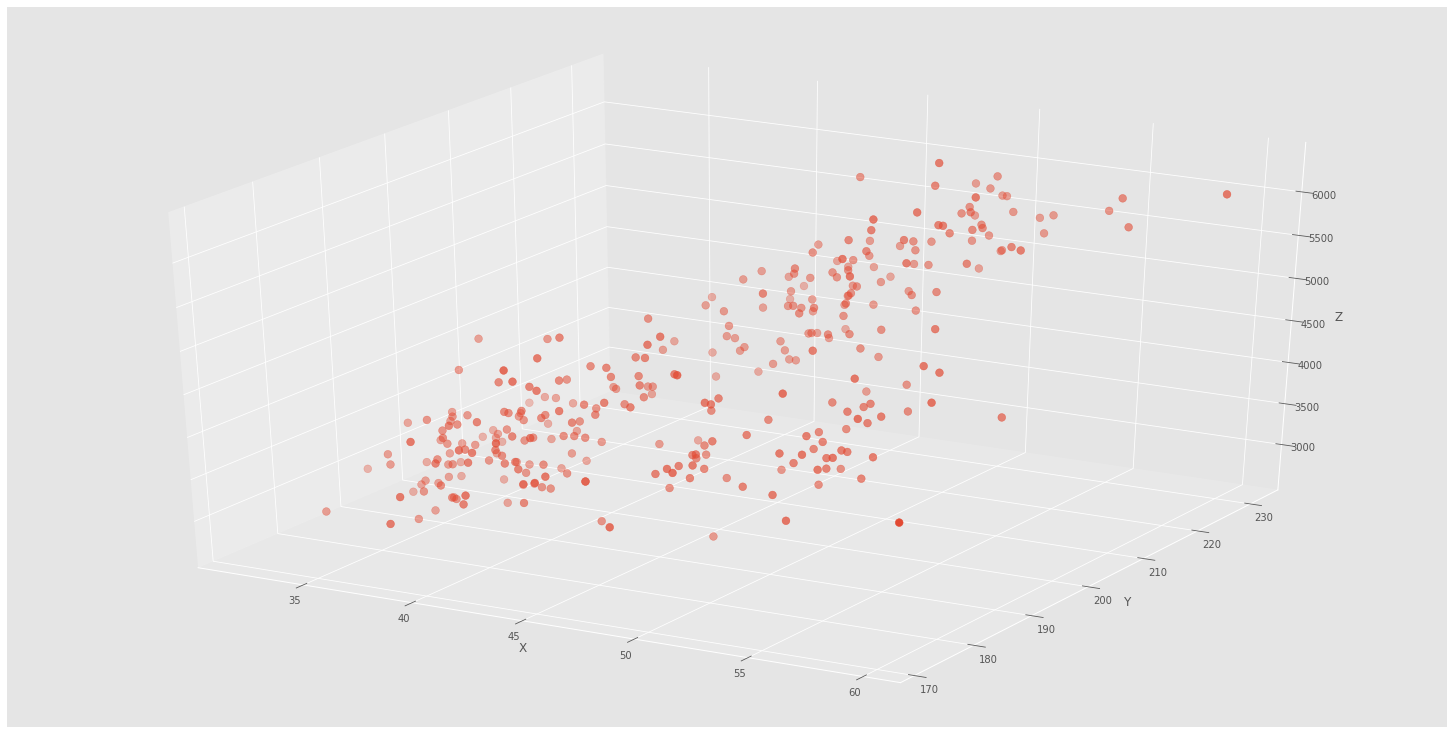

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=60)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')

Finalmente, podemos crear nuestro hiperplano de mejor ajuste al explotar las funciones de la algebra linear.

En este caso, definimos nuestros valores x, y, z que comprenderan un arreglo definido como data. Con la función meshgrid creamos el espacio tridimensional en el que se despelgarán nuestros puntos e hiperplano.

A continuación, utilizamos un condicional ya que la correlación entre puntos no necesariamente puede dar un hiperplano cuadrado sino una curva cuadrada. En este caso, nos dará un hiperplano dado el polinomio con el que estamos trabajando. 

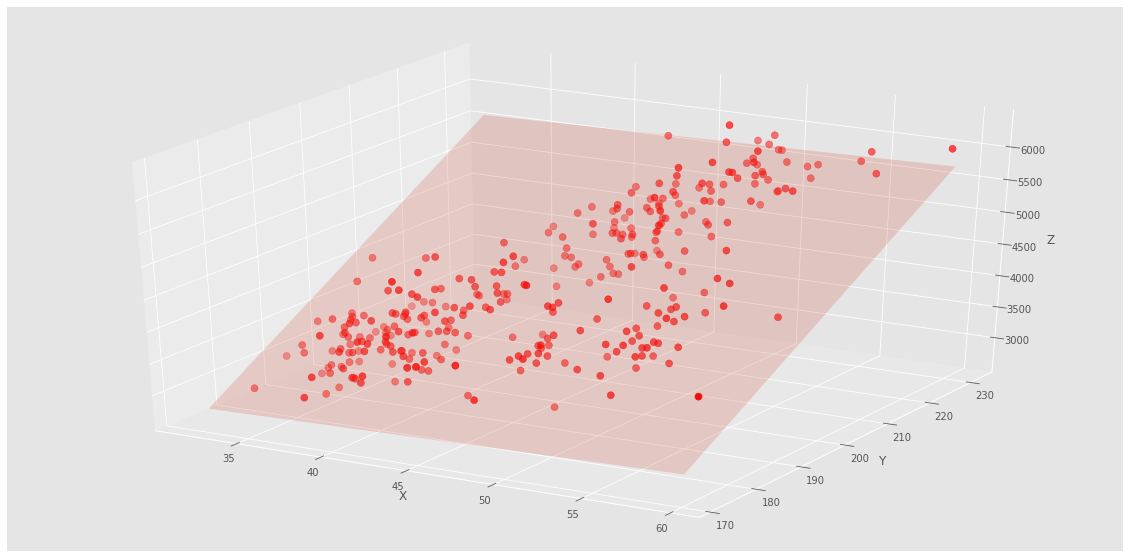

In [20]:
x = df["bill_length_mm"]
y = df["flipper_length_mm"]
z = df["body_mass_g"]
data = np.c_[x,y,z]

mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))

order = 1   
if order == 1:
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])   
    
    Z = C[0]*X + C[1]*Y + C[2]
    

elif order == 2:

    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    

    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('tight')
plt.show()